In [13]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob


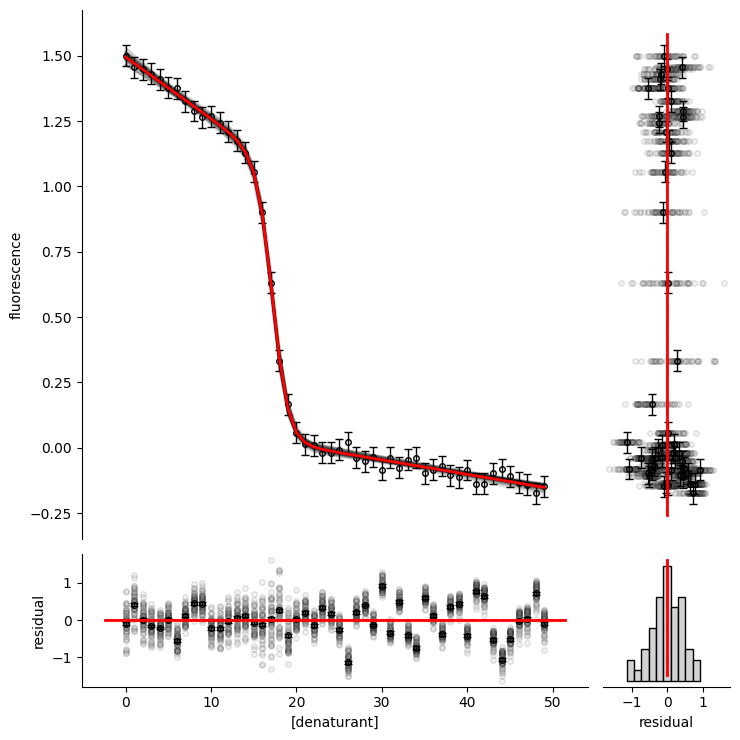

In [17]:
%matplotlib inline
import dataprob
import numpy as np

# ------------------------------------------------------------------------
# Define model and generate data

def linear_extrapolation(dG_unfold=5,m_unfold=-2,
                         b_native=1,m_native=0,
                         b_denat=0,m_denat=0,
                         osmolyte=None,T=298.15,R=0.001987):
    """
    Linear extrapolation unfolding model. 

    Parameters
    ----------
    dG_unfold : float, default=5
        unfolding free energy in water
    m_unfold : float, default=-2
        effect of osmoloyte on the folding energy
    b_native : float, default=1
        intercept of the native baseline
    m_native : float, defualt=0
        slope of the native baseline
    b_denat : float, default=0
        intercept of the denatured baseline
    m_denat : float, defualt=0
        slope of the denatured baseline
    osmolyte : numpy.ndarray
        array of osmolyte concentrations
    T : float, default=298.15
        temperature of experiment in K
    R : float, default=0.001987
        gas constant (default is kcal/mol)

    Returns
    -------
    signal : numpy.ndarray
        protein fraction folded signal as a function of osmolyte
    """
        
    RT = R*T
    dG = dG_unfold + m_unfold*osmolyte
    K = np.exp(-dG/RT)
    
    fx = 1/(1 + K)
    native_signal = (m_native*osmolyte + b_native)*fx
    denatured_signal = (m_denat*osmolyte + b_denat)*(1 - fx)

    return native_signal + denatured_signal
        
# Parameter for staphylococcal nuclease d+phs protein, pH 7.0
gen_params = {"dG_unfold":11.9,
              "m_unfold":-4.2,
              "b_native":1.5,
              "m_native":-0.15,
              "b_denat":0.1,
              "m_denat":-0.03}

# Generate data
T = 298
R = 0.001987
err = 0.020
num_points = 50
osmolyte = np.linspace(0,8,num_points)

y_obs_clean = linear_extrapolation(osmolyte=osmolyte,
                                   R=R,T=T,
                                   **gen_params)
y_obs = y_obs_clean + np.random.normal(0,err,num_points)
y_std = err*2

test_fcn = linear_extrapolation
non_fit_kwargs = {"osmolyte":osmolyte,
                  "R":R,
                  "T":T}

# ------------------------------------------------------------------------
# Run analysis

f = dataprob.setup(some_function=test_fcn,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)


f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f,x_label="[denaturant]",y_label="fluorescence")

not doing corner plot for parameter  b_native
not doing corner plot for parameter  m_native
not doing corner plot for parameter  b_denat
not doing corner plot for parameter  m_denat


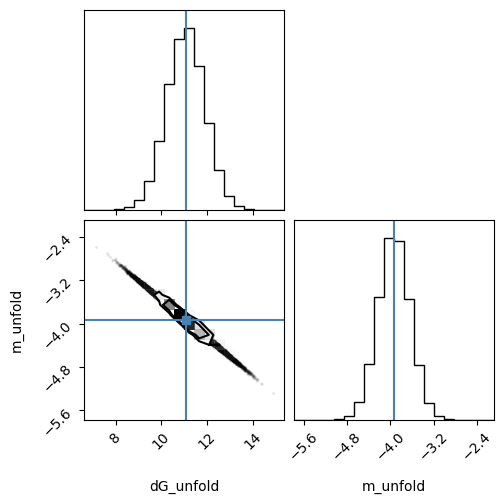

In [18]:
fig = dataprob.plot_corner(f,filter_params=["native","denat"])


In [19]:
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
dG_unfold,dG_unfold,11.074728,0.827363,9.406191,12.743264,5.0,False,-inf,inf,NaN,NaN
m_unfold,m_unfold,-3.932109,0.290666,-4.518294,-3.345924,-2.0,False,-inf,inf,NaN,NaN
b_native,b_native,1.495562,0.014160,1.467006,1.524118,1.0,False,-inf,inf,NaN,NaN
m_native,m_native,-0.144355,0.011074,-0.166688,-0.122023,0.0,False,-inf,inf,NaN,NaN
b_denat,b_denat,0.119949,0.022786,0.073996,0.165901,0.0,False,-inf,inf,NaN,NaN
m_denat,m_denat,-0.033927,0.003871,-0.041734,-0.026120,0.0,False,-inf,inf,NaN,NaN
